# Regressao Linear - Açudes da Paraíba - 2017
## http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

In [1]:
import pandas as pd

In [2]:
# leitura do dataset
#
# Acude de Boqueirão com Recarga do Rio São Francisco - 30/04/2017 ate 17/07/2017
df = pd.read_excel(open("Boqueirao-Com-Recarga-SF-2017.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,30/04/2017,3.45,14183577.80,0
1,Epitácio Pessoa,01/05/2017,3.51,14465847.32,0
2,Epitácio Pessoa,02/05/2017,3.58,14748116.84,0
3,Epitácio Pessoa,03/05/2017,3.65,15030386.36,0
4,Epitácio Pessoa,04/05/2017,3.74,15383223.26,0


In [3]:
#del df["Açude"]
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,30/04/2017,3.45,14183577.80,0
1,Epitácio Pessoa,01/05/2017,3.51,14465847.32,0
2,Epitácio Pessoa,02/05/2017,3.58,14748116.84,0
3,Epitácio Pessoa,03/05/2017,3.65,15030386.36,0
4,Epitácio Pessoa,04/05/2017,3.74,15383223.26,0


In [4]:
df.tail()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
74,Epitácio Pessoa,13/07/2017,7.24,29821949.70,0
75,Epitácio Pessoa,14/07/2017,7.26,29879023.48,0
76,Epitácio Pessoa,15/07/2017,7.29,29993171.04,0
77,Epitácio Pessoa,16/07/2017,7.31,30107318.60,0
78,Epitácio Pessoa,17/07/2017,7.33,30164392.38,0


In [5]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,2017-04-30,3.45,14183577.80,0
1,Epitácio Pessoa,2017-05-01,3.51,14465847.32,0
2,Epitácio Pessoa,2017-05-02,3.58,14748116.84,0
3,Epitácio Pessoa,2017-05-03,3.65,15030386.36,0
4,Epitácio Pessoa,2017-05-04,3.74,15383223.26,0


In [6]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
#del df2['Data do registro']
df2.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,,,
2017-04-30,Epitácio Pessoa,2017-04-30,3.45,14183577.80,0
2017-05-01,Epitácio Pessoa,2017-05-01,3.51,14465847.32,0
2017-05-02,Epitácio Pessoa,2017-05-02,3.58,14748116.84,0
2017-05-03,Epitácio Pessoa,2017-05-03,3.65,15030386.36,0
2017-05-04,Epitácio Pessoa,2017-05-04,3.74,15383223.26,0


In [7]:
del df2["Açude"]
df2.describe()

,Volume (%),Volume (m³),Volume de chuvas (mm)
count,79.000000,7.900000e+01,79.0
mean,5.758481,2.370785e+07,0.0
std,1.172319,4.826506e+06,0.0
min,3.450000,1.418358e+07,0.0
25%,4.800000,1.974384e+07,0.0
50%,5.960000,2.454600e+07,0.0
75%,6.740000,2.773876e+07,0.0
max,7.330000,3.016439e+07,0.0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2017-04-30 to 2017-07-17
Data columns (total 4 columns):
Data do registro         79 non-null datetime64[ns]
Volume (%)               79 non-null float64
Volume (m³)              79 non-null float64
Volume de chuvas (mm)    79 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.1 KB


In [ ]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

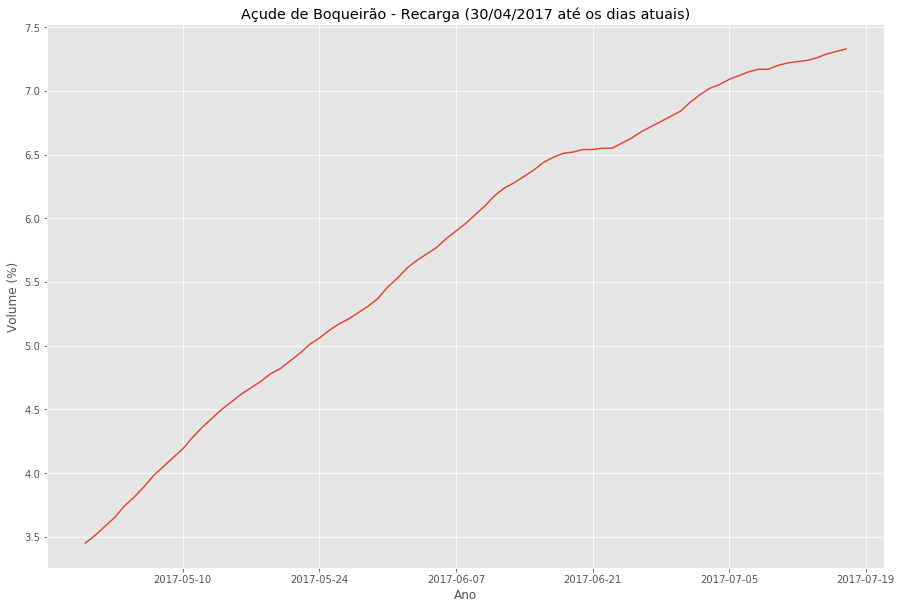

In [15]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Boqueirão - Recarga (30/04/2017 até os dias atuais)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.savefig("Boqueirao-recarga-01.pdf")

plt.show()

In [16]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias = len(df3)
df3["dia"] = range(1,numero_de_dias+1)
df3.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2017-04-30,2017-04-30,3.45,14183577.80,0,1
2017-05-01,2017-05-01,3.51,14465847.32,0,2
2017-05-02,2017-05-02,3.58,14748116.84,0,3
2017-05-03,2017-05-03,3.65,15030386.36,0,4
2017-05-04,2017-05-04,3.74,15383223.26,0,5


In [17]:
len(df3) # numero de tuplas ou linhas ou medições

79

In [18]:
df3.tail()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2017-07-13,2017-07-13,7.24,29821949.70,0,75
2017-07-14,2017-07-14,7.26,29879023.48,0,76
2017-07-15,2017-07-15,7.29,29993171.04,0,77
2017-07-16,2017-07-16,7.31,30107318.60,0,78
2017-07-17,2017-07-17,7.33,30164392.38,0,79


In [19]:
# Preparar os dados para aplicar o modelo de regressao
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

df3.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2017-04-30,2017-04-30,3.45,14183577.80,0,1
2017-05-01,2017-05-01,3.51,14465847.32,0,2
2017-05-02,2017-05-02,3.58,14748116.84,0,3
2017-05-03,2017-05-03,3.65,15030386.36,0,4
2017-05-04,2017-05-04,3.74,15383223.26,0,5


In [20]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
y = df3['Volume (%)']
olm.fit(X, y)

# Predict values
yp = [olm.predict(x.toordinal())[0] for x in df3.index]

# Evaluate the model
olm_score = olm.score(X, y)

olm_score

0.97699705757783895

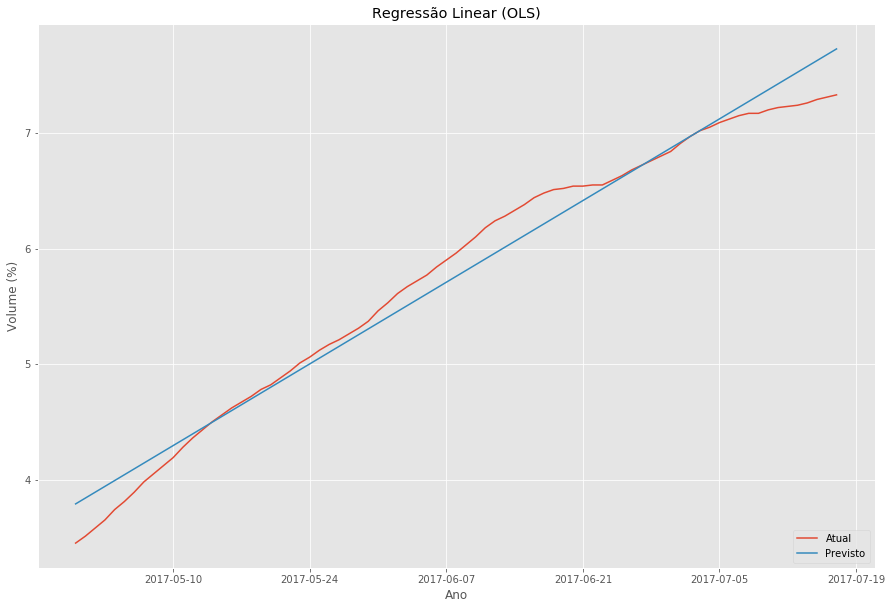

In [26]:
# Plota os dados
my_dpi=96
#plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.figure( dpi=100)
%matplotlib inline
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
plt.plot(df3.index, y)
plt.plot(df3.index, yp)

# Add decorations
plt.title("Regressão Linear (OLS)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto"], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
plt.savefig(path + "/BoqueiraoComRecarga.pdf")
plt.show()

In [27]:
# preparando a saida para plotar

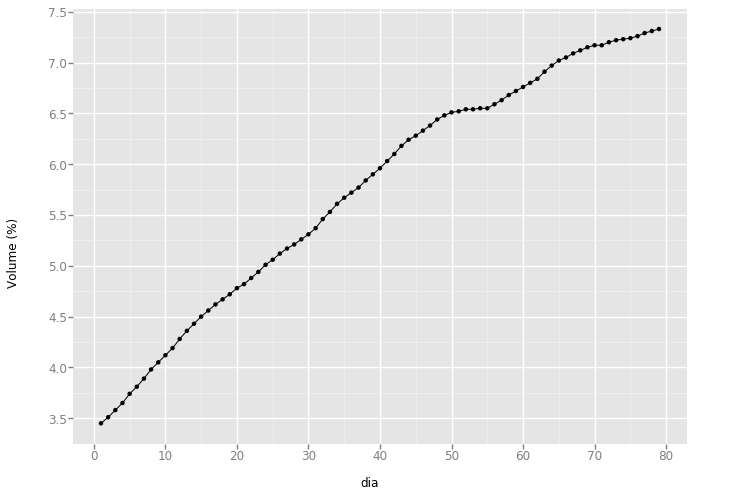

<ggplot: (-9223372036560221650)>


In [28]:
from ggplot import *

print (ggplot(df3, aes('dia','Volume (%)')) + 
  geom_point(colour='steelblue') +
  geom_line(data = df3) 
 )


In [29]:
# criar o modelo de regressao
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Use only one feature
x = df3["dia"]

split_dados = int(numero_de_dias * 0.66)

print (split_dados)
print (numero_de_dias)

52
79


In [31]:
# Split dos dados em conjuntos de treino/teste  


X_train = x[-split_dados:].reshape(-1, 1)
X_test = x[:-split_dados].reshape(-1, 1)

y = df3["Volume (%)"]

Y_train = y[-split_dados:]
Y_test = y[:-split_dados]


print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

52
27
52
27


In [32]:
# usar o modelo de regressão linear 
X = X_train
Y = Y_train  

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Variance score: %.2f' % regr.score(X_test, Y_test))


print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))

Variance score: -0.06
Mean squared error: 0.29


In [33]:
# a reta de regressao
a = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.04095321437718773 * x + 4.29034918466661


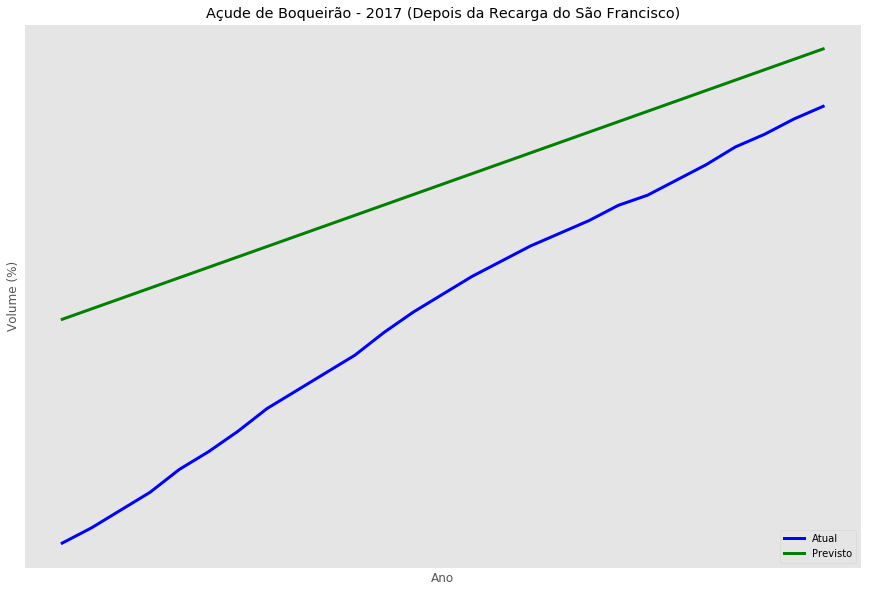

In [39]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_test, color='blue',
         linewidth=3)
plt.plot(X_test, regr.predict(X_test), color='green',
         linewidth=3)

plt.xticks(())
plt.yticks(())

# Add decorations
plt.title("Açude de Boqueirão - 2017 (Depois da Recarga do São Francisco)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
plt.savefig(path + "/BoqueiraoComRecarga.pdf")
plt.show()



In [41]:
# Plot usando o pacote  ggplot2 for python

# converter o X para lista
x = []
for i in range(len(X_test)):
    x.append(X_test[i][0])

dfs = pd.DataFrame({"dia": x , "Volume%" : Y_test})  #{'col1': ts1, 'col2': ts2}

dfs.head()

,Volume%,dia
Data do registro,,
2017-04-30,3.45,1
2017-05-01,3.51,2
2017-05-02,3.58,3
2017-05-03,3.65,4
2017-05-04,3.74,5


In [43]:
# Construir um dataframe para a predicao
print("predição")
dfpredict = pd.DataFrame({"dia": x , "Volume%" : regr.predict(X_test)})  #{'col1': ts1, 'col2': ts2}
dfpredict.head()

predição


,Volume%,dia
0,4.331302,1
1,4.372256,2
2,4.413209,3
3,4.454162,4
4,4.495115,5


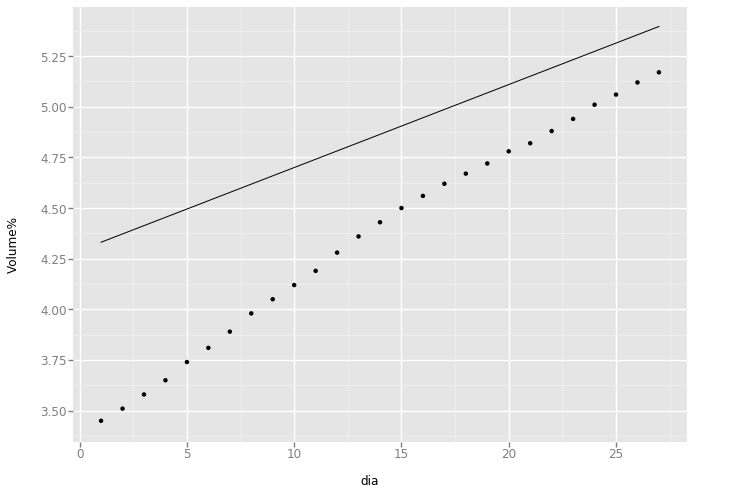

<ggplot: (-9223372036559769705)>


In [44]:
# using ggplot2 for python
# !pip install ggplot
from ggplot import *

print (ggplot(dfs, aes('dia', 'Volume%')) + 
  geom_point(colour='steelblue') +
  geom_line(data = dfpredict) 
 )

In [45]:
# predicao futura
numero_de_dias = len(X_train)
numero_de_dias

52

In [46]:
regr.predict([365*3])[0]

49.134118927687169

In [47]:
# predicao para 1 anos
pred = regr.predict([365])[0]

print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  19.24 %


In [48]:
# predicao para 2 anos
pred = regr.predict([365*2])[0]

print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  34.19 %


In [49]:
# predicao até verter água-sangrar

ano = 1
while (True):
    pred = regr.predict([365*ano])[0]
    if pred > 100:
        break
    print ("Volume Boqueirão depois de %d ano(s) -> %-5.2f%%" % (ano,pred))
    ano = ano + 1

Volume Boqueirão depois de 1 ano(s) -> 19.24%
Volume Boqueirão depois de 2 ano(s) -> 34.19%
Volume Boqueirão depois de 3 ano(s) -> 49.13%
Volume Boqueirão depois de 4 ano(s) -> 64.08%
Volume Boqueirão depois de 5 ano(s) -> 79.03%
Volume Boqueirão depois de 6 ano(s) -> 93.98%
